In [1]:
%matplotlib notebook

At first tried the code in this link, but I needed to sign up for plotly for it to work: https://moderndata.plot.ly/3d-surface-plots-in-ipython-notebook-and-plotly/

Then below is code from this link: https://matplotlib.org/examples/mplot3d/scatter3d_demo.html

<IPython.core.display.Javascript object>


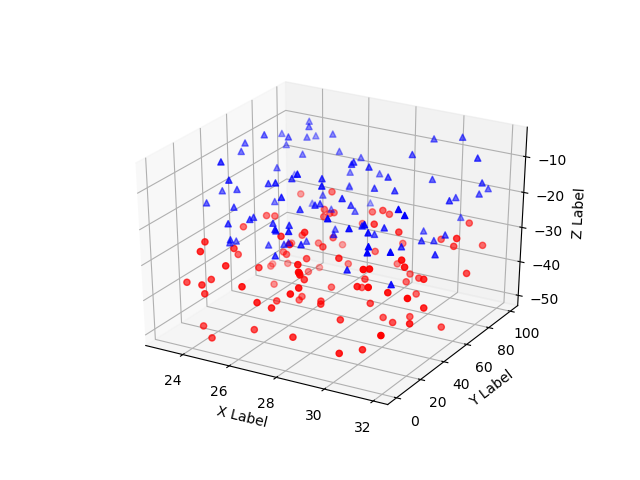

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [4]:
 from transforms3d.euler import euler2mat, mat2euler

In [5]:
x_angle = -0.2
y_angle = -np.pi / 2
z_angle = -0.2
R = euler2mat(x_angle, y_angle, z_angle, 'sxyz')
R

array([[  6.00117699e-17,   3.89418342e-01,  -9.21060994e-01],
       [ -1.21649880e-17,   9.21060994e-01,   3.89418342e-01],
       [  1.00000000e+00,  -1.21649880e-17,   6.00117699e-17]])

In [6]:
R = euler2mat(x_angle, y_angle, z_angle, 'szyz')
R

array([[ -3.94695030e-02,   1.94709171e-01,  -9.80066578e-01],
       [ -1.94709171e-01,   9.60530497e-01,   1.98669331e-01],
       [  9.80066578e-01,   1.98669331e-01,   6.12323400e-17]])

Here we will define a set of samples selected evenly from our Euler angles.

In [7]:
#in zyz the first and the last are from 0 to 2pi and the middle one is 0 to pi
x = np.linspace(0, 2*np.pi, 20)
y = np.linspace(0, np.pi, 10)
z = np.linspace(0, 2*np.pi, 20)

<IPython.core.display.Javascript object>


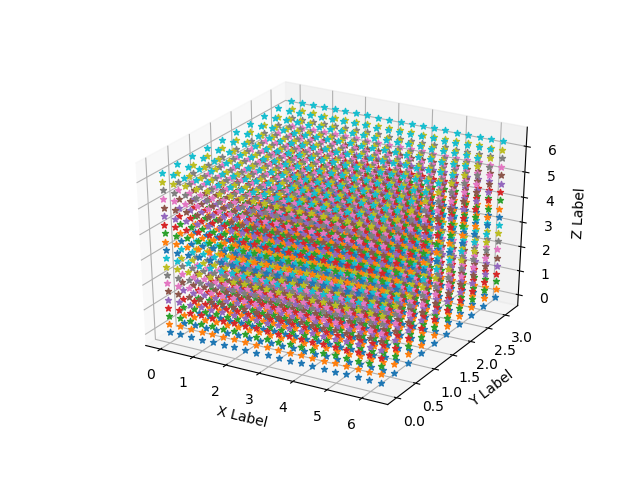

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(20):
    for j in range(10):
        for k in range(20):
            ax.scatter(x[i],y[j],z[k], marker='*')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

This is the heads up direction of the penguin at each of these Euler angles.

<IPython.core.display.Javascript object>


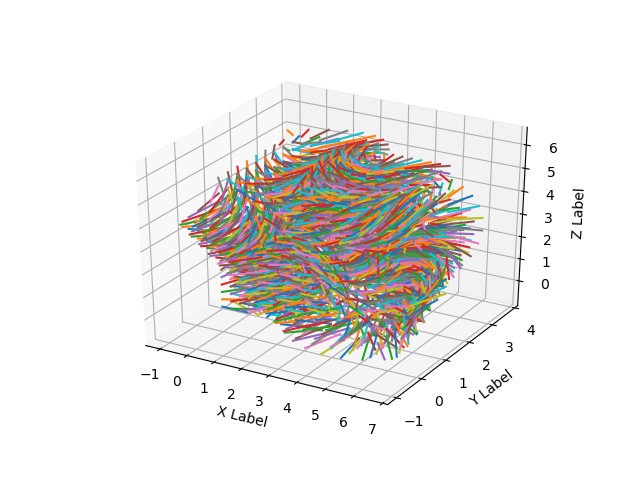

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(18):
    for j in range(9):
        for k in range(18):
            R_circle = euler2mat(x[i], y[j], z[k], 'szyz')
            ax.plot((x[i],x[i]+R_circle[0,0]),
                    (y[j],y[j]+R_circle[1,0]),
                    (z[k],z[k]+R_circle[2,0]))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [10]:
def rot2quat(my_matrix):
    
    Tr_matrix = my_matrix - my_matrix.T
    
    q0 = (np.sqrt( np.trace(my_matrix)+1 ))*0.5
    qz = Tr_matrix[0,1]/(-4.0*q0)
    qy = Tr_matrix[2,0]/(-4.0*q0)
    qx = Tr_matrix[1,2]/(-4.0*q0)
    
    return [q0,qx,qy,qz]

In [11]:
my_quat = rot2quat(R)

In [12]:
my_quat

[0.69301172320583526, -0.0, -0.70710678118654757, -0.14048043101898117]

In [13]:
R

array([[ -3.94695030e-02,   1.94709171e-01,  -9.80066578e-01],
       [ -1.94709171e-01,   9.60530497e-01,   1.98669331e-01],
       [  9.80066578e-01,   1.98669331e-01,   6.12323400e-17]])

In [14]:
np.dot(my_quat,my_quat)

1.0

This is the distribution of our Euler angles on the quaternion sphere, note we do not display the q0, since we can't visualize in four dimensions.

<IPython.core.display.Javascript object>


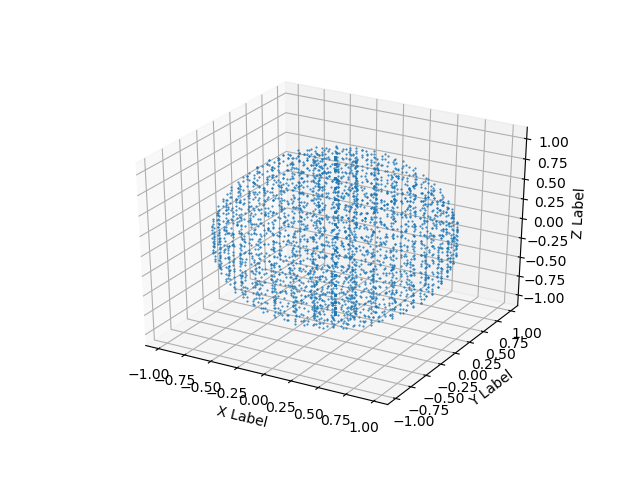

/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(20):
    for j in range(10):
        for k in range(20):
            R_circle = euler2mat(x[i], y[j], z[k], 'szyz')
            q_R = rot2quat(R_circle)
            ax.scatter(q_R[1],q_R[2],q_R[3],marker='.',s=1,color='C0')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Now let's try to make more samples and from a uniform distribution rather than an even distribution.

In [16]:
30*15*30

13500

In [17]:
sample_range = 15

In [28]:
#in zyz the first and the last are from 0 to 2pi and the middle one is 0 to pi
x_lin = np.linspace(0, 2*np.pi, 2*sample_range)
y_lin = np.linspace(0, np.pi, sample_range)
z_lin = np.linspace(0, 2*np.pi, 2*sample_range)

<IPython.core.display.Javascript object>


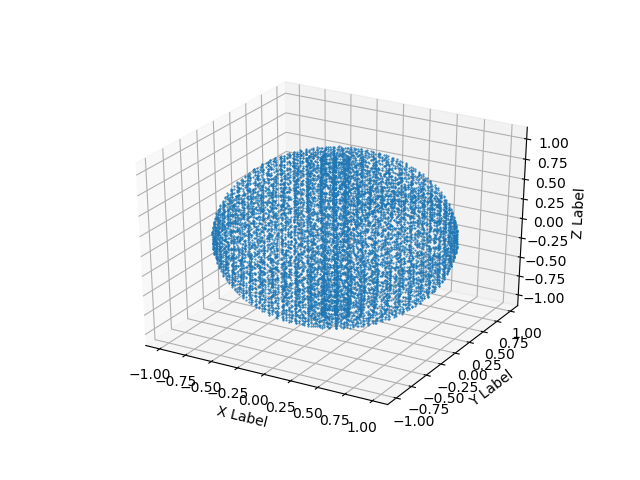

/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(2*sample_range):
    for j in range(sample_range):
        for k in range(2*sample_range):
            R_circle = euler2mat(x_lin[i], y_lin[j], z_lin[k], 'szyz')
            q_R = rot2quat(R_circle)
            ax.scatter(q_R[1],q_R[2],q_R[3],marker='.',s=1,color='C0')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [48]:
#in zyz the first and the last are from 0 to 2pi and the middle one is 0 to pi
x = np.random.uniform(0, 2*np.pi, 2*sample_range)
y = np.random.uniform(0, np.pi, sample_range)
z = np.random.uniform(0, 2*np.pi, 2*sample_range)

<IPython.core.display.Javascript object>


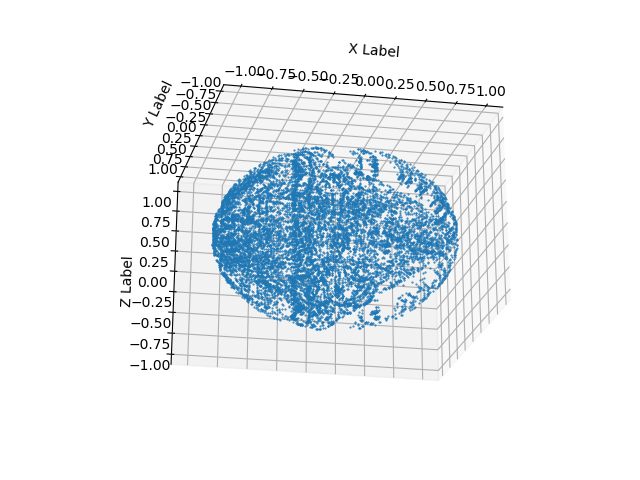

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(2*sample_range):
    for j in range(sample_range):
        for k in range(2*sample_range):
            R_circle = euler2mat(x[i], y[j], z[k], 'szyz')
            q_R = rot2quat(R_circle)
            ax.scatter(q_R[1],q_R[2],q_R[3],marker='.',s=1,color='C0')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>


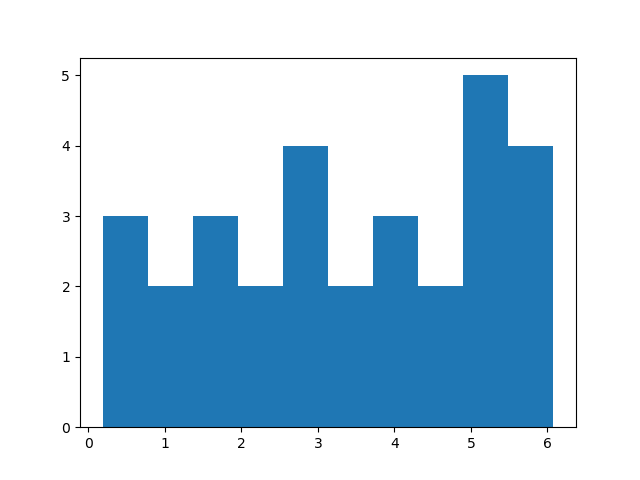

In [50]:
fig = plt.figure()
plt.hist(x);
plt.show()

<IPython.core.display.Javascript object>


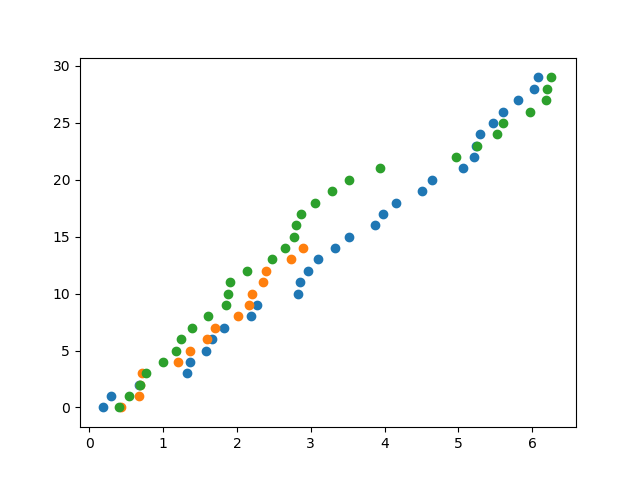

In [51]:
fig = plt.figure()
plt.scatter(np.sort(x),range(len(x)))
plt.scatter(np.sort(y),range(len(y)))
plt.scatter(np.sort(z),range(len(z)))
plt.show()

<IPython.core.display.Javascript object>


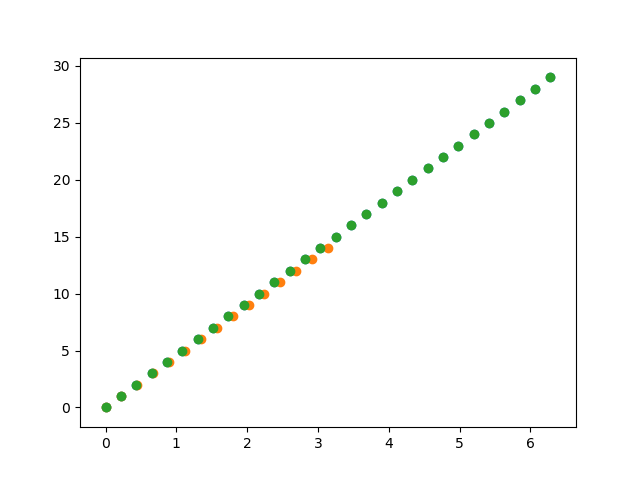

In [44]:
fig = plt.figure()
plt.scatter(x_lin,range(len(x)))
plt.scatter(y_lin,range(len(y)))
plt.scatter(z_lin,range(len(z)))
plt.show()

Let's build our histograms in quaternion space of these two.

In [53]:
q_R = []
q_R_lin = []

In [54]:
for i in range(2*sample_range):
    for j in range(sample_range):
        for k in range(2*sample_range):
            R_circle = euler2mat(x[i], y[j], z[k], 'szyz')
            q_R.append(rot2quat(R_circle))



In [55]:
for i in range(2*sample_range):
    for j in range(sample_range):
        for k in range(2*sample_range):
            R_circle = euler2mat(x_lin[i], y_lin[j], z_lin[k], 'szyz')
            q_R_lin.append(rot2quat(R_circle))



/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/hansons/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [70]:
len(q_R)

13500

In [71]:
len([q_R[0] for q in q_R])

13500

In [93]:
q0_R = [q[0] for q in q_R]

In [98]:
q1_R = [q[1] for q in q_R]

In [99]:
q2_R = [q[2] for q in q_R]

In [100]:
q3_R = [q[3] for q in q_R]

<IPython.core.display.Javascript object>


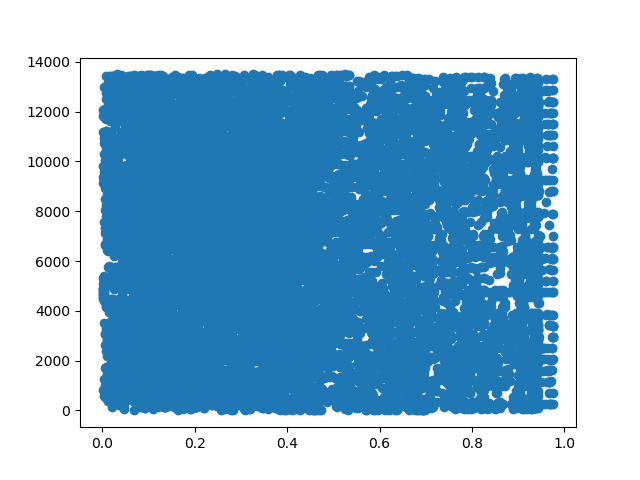

In [97]:
fig = plt.figure()
plt.plot(q0_R,range(len(q0_R)),'o',color='C0')
plt.show()

<IPython.core.display.Javascript object>


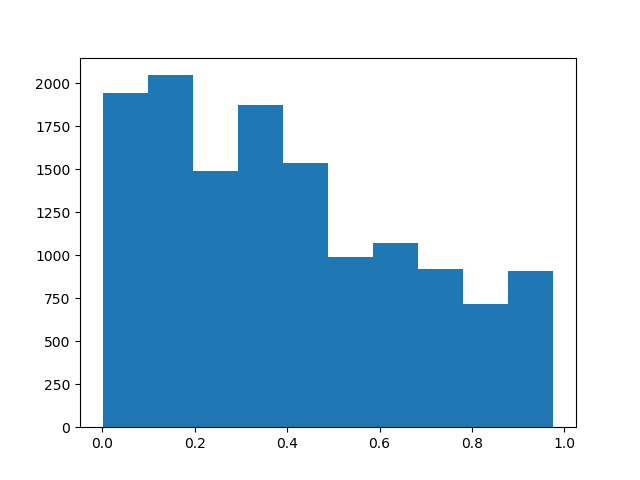

In [101]:
fig = plt.figure()
plt.hist(q0_R)
plt.show()

<IPython.core.display.Javascript object>


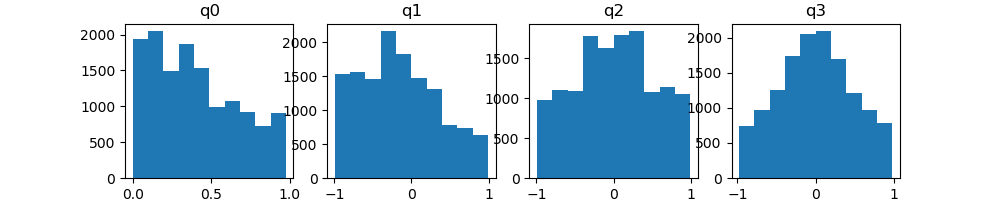

In [124]:
fig, axes = plt.subplots(1,4,figsize=(10,2))
for i in range(4):
    axes[i].hist([q[i] for q in q_R])
    axes[i].set_title('q%s'%i)
plt.show()

q1 is annoying because it has `inf` in it so we are skipping it for now

In [155]:
my_values = [0,2,3]

<IPython.core.display.Javascript object>


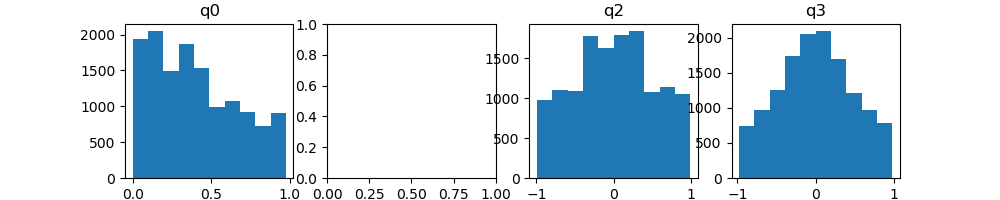

In [159]:
fig, axes = plt.subplots(1,4,figsize=(10,2))
for i in my_values:
    axes[i].hist([q[i] for q in q_R])
    axes[i].set_title('q%s'%i)
plt.show()

### Next we need to determine what a uniformly distributed rotation space _SHOULD_ look like. Is it like this?

And below is another example from a matplotlib demo that uses polar coordinates, which we actually don't need to use: https://matplotlib.org/examples/mplot3d/surface3d_radial_demo.html

<IPython.core.display.Javascript object>


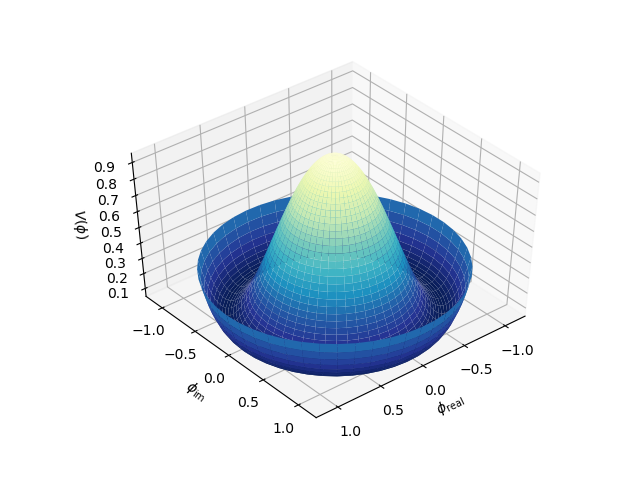

In [3]:
'''
=================================
3D surface with polar coordinates
=================================

Demonstrates plotting a surface defined in polar coordinates.
Uses the reversed version of the YlGnBu color map.
Also demonstrates writing axis labels with latex math mode.

Example contributed by Armin Moser.
'''

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

Now I'm going to see if I can just make this into a sphere.

<IPython.core.display.Javascript object>


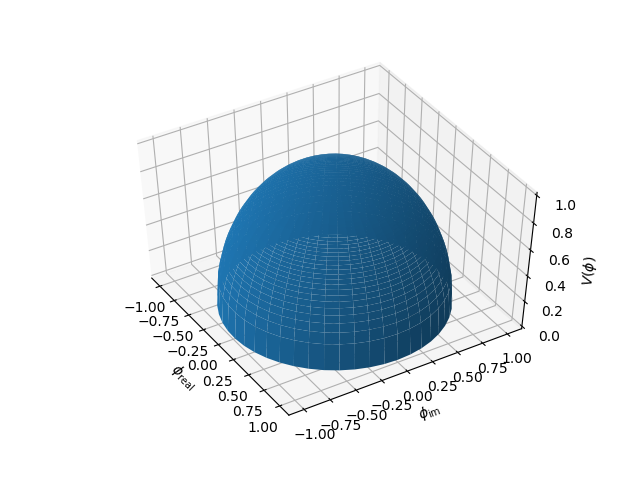

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
#Z = (R**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

Z = np.sqrt(1-R**2)

ax.plot_surface(X, Y, Z)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()